In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('final_dataset.csv')
df.columns

Index(['id', 'title', 'year', 'duration', 'MPA', 'rating', 'votes',
       'meta_score', 'description', 'Movie_Link', 'writers', 'directors',
       'stars', 'budget', 'opening_weekend_gross', 'gross_worldwide',
       'gross_us_canada', 'release_date', 'countries_origin',
       'filming_locations', 'production_companies', 'awards_content', 'genres',
       'languages'],
      dtype='object')

In [8]:
df.drop(columns = ['Movie_Link'], inplace = True)

In [9]:
df.head(5)

,id,title,year,duration,MPA,rating,votes,meta_score,description,writers,...,opening_weekend_gross,gross_worldwide,gross_us_canada,release_date,countries_origin,filming_locations,production_companies,awards_content,genres,languages
0,tt0073195,Jaws,1975,2h 4m,PG,8.1,690K,87.0,When a massive killer shark unleashes chaos on...,"['Peter Benchley', 'Carl Gottlieb']",...,"$7,061,513","$477,916,625","$267,263,625",1975.0,['United States'],"[""Water Street, Edgartown, Martha's Vineyard, ...","['Zanuck/Brown Productions', 'Universal Pictur...","Won 3 Oscars, 16 wins & 20 nominations total","['Monster Horror', 'Sea Adventure', 'Survival'...",['English']
1,tt0073629,The Rocky Horror Picture Show,1975,1h 40m,R,7.4,174K,65.0,A newly-engaged couple have a breakdown in an ...,"[""Richard O'Brien"", 'Jim Sharman']",...,NaN,"$115,827,018","$112,892,319",1975.0,"['United Kingdom', 'United States']","[""Oakley Court, Windsor Road, Oakley Green, Wi...","['Twentieth Century Fox', 'Michael White Produ...","Awards, 3 wins & 4 nominations total","['B-Horror', 'Dark Comedy', 'Parody', 'Raunchy...",['English']
2,tt0073486,One Flew Over the Cuckoo's Nest,1975,2h 13m,R,8.7,1.1M,84.0,"In the Fall of 1963, a Korean War veteran and ...","['Lawrence Hauben', 'Bo Goldman', 'Ken Kesey']",...,NaN,"$109,115,366","$108,981,275",1975.0,['United States'],['Oregon State Mental Hospital - 2600 Center S...,"['Fantasy Films', 'N.V. Zvaluw']","Won 5 Oscars, 38 wins & 15 nominations total","['Medical Drama', 'Psychological Drama', 'Drama']",['English']
3,tt0072890,Dog Day Afternoon,1975,2h 5m,R,8.0,281K,86.0,Three amateur robbers plan to hold up a Brookl...,"['Frank Pierson', 'P.F. Kluge', 'Thomas Moore']",...,NaN,"$50,004,527","$50,000,000",1975.0,['United States'],"['285 Prospect Park West, Brooklyn, New York C...","['Warner Bros.', 'Artists Entertainment Complex']","Won 1 Oscar, 14 wins & 20 nominations total","['Dark Comedy', 'Heist', 'True Crime', 'Biogra...",['English']
4,tt0073692,Shampoo,1975,1h 50m,R,6.4,15K,65.0,"On Election Day, 1968, irresponsible hairdress...","['Robert Towne', 'Warren Beatty']",...,NaN,"$49,407,734","$49,407,734",1975.0,['United States'],"[""2270 Bowmont Drive, Beverly Hills, Californi...","['Persky-Bright / Vista', 'Columbia Pictures',...","Won 1 Oscar, 3 wins & 11 nominations total","['Satire', 'Comedy', 'Drama']",['English']


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63249 entries, 0 to 63248
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     63249 non-null  object 
 1   title                  63249 non-null  object 
 2   year                   63249 non-null  int64  
 3   duration               61174 non-null  object 
 4   MPA                    41227 non-null  object 
 5   rating                 59181 non-null  float64
 6   votes                  59181 non-null  object 
 7   meta_score             15533 non-null  float64
 8   description            60889 non-null  object 
 9   writers                62980 non-null  object 
 10  directors              63198 non-null  object 
 11  stars                  62905 non-null  object 
 12  budget                 15359 non-null  object 
 13  opening_weekend_gross  16837 non-null  object 
 14  gross_worldwide        20722 non-null  object 
 15  gr

In [11]:
df.isnull().sum()

id                           0
title                        0
year                         0
duration                  2075
MPA                      22022
rating                    4068
votes                     4068
meta_score               47716
description               2360
writers                    269
directors                   51
stars                      344
budget                   47890
opening_weekend_gross    46412
gross_worldwide          42527
gross_us_canada          43705
release_date              8400
countries_origin            99
filming_locations        16854
production_companies      1973
awards_content           36181
genres                     787
languages                  330
dtype: int64

In [12]:
df.fillna(
    {
        'duration': 'NotKnown',
        'MPA' : 'NotRated',  
        'rating' : 'NotRated',
        'votes' : 0,
        'meta_score' : 0,
        'description' : 'NotAvailable',
        'writers': 'NoKnown',
        'directors': 'NotKnown',
        'stars': 'NotKnown',
        'budget' : 'NotKnown',
        'opening_weekend_gross' : 'NotKnown',
        'gross_worldwide' : 'NotKnown',
        'gross_us_canada': 'NotKnown',
        'release_date' : 'NotAvailable',
        'countries_origin' : 'NotKnown',
        'filming_locations': 'NotKnown',
        'production_companies': 'NotKnown',
        'awards_content' : 'NotKnown',
        'languages' : 'NotKnown'
    },inplace = True
)

In [13]:
df.dropna(subset=['genres'], inplace=True)

In [14]:
df.isnull().sum()

id                       0
title                    0
year                     0
duration                 0
MPA                      0
rating                   0
votes                    0
meta_score               0
description              0
writers                  0
directors                0
stars                    0
budget                   0
opening_weekend_gross    0
gross_worldwide          0
gross_us_canada          0
release_date             0
countries_origin         0
filming_locations        0
production_companies     0
awards_content           0
genres                   0
languages                0
dtype: int64

In [15]:
df['MPA'] = df['MPA'].replace({'Not Rated' : 'NotRated'})

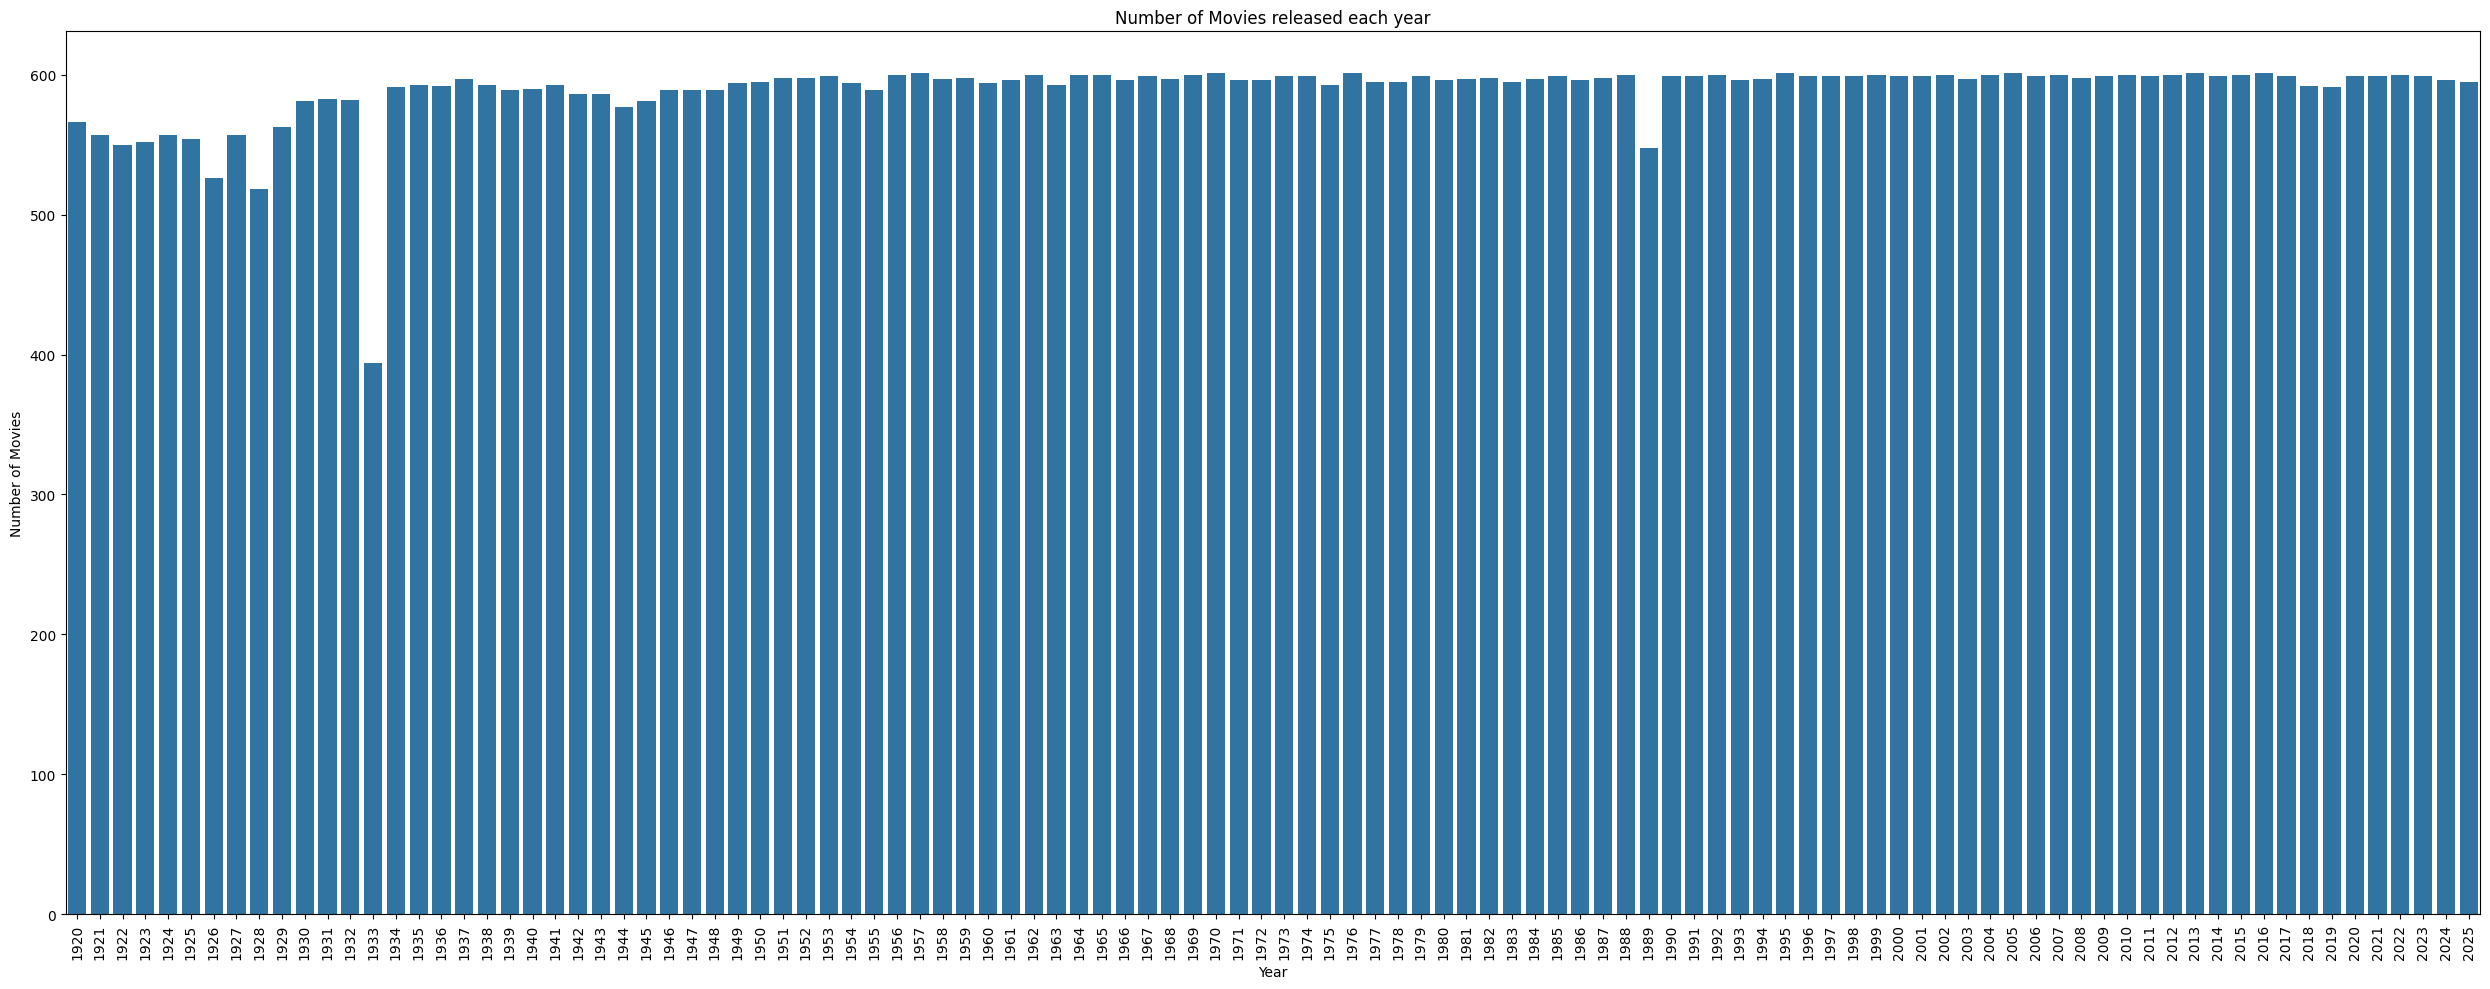

In [16]:
plt.figure(figsize = (25, 10))
plt.title('Number of Movies released each year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
sns.countplot(x = df['year'], data = df)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

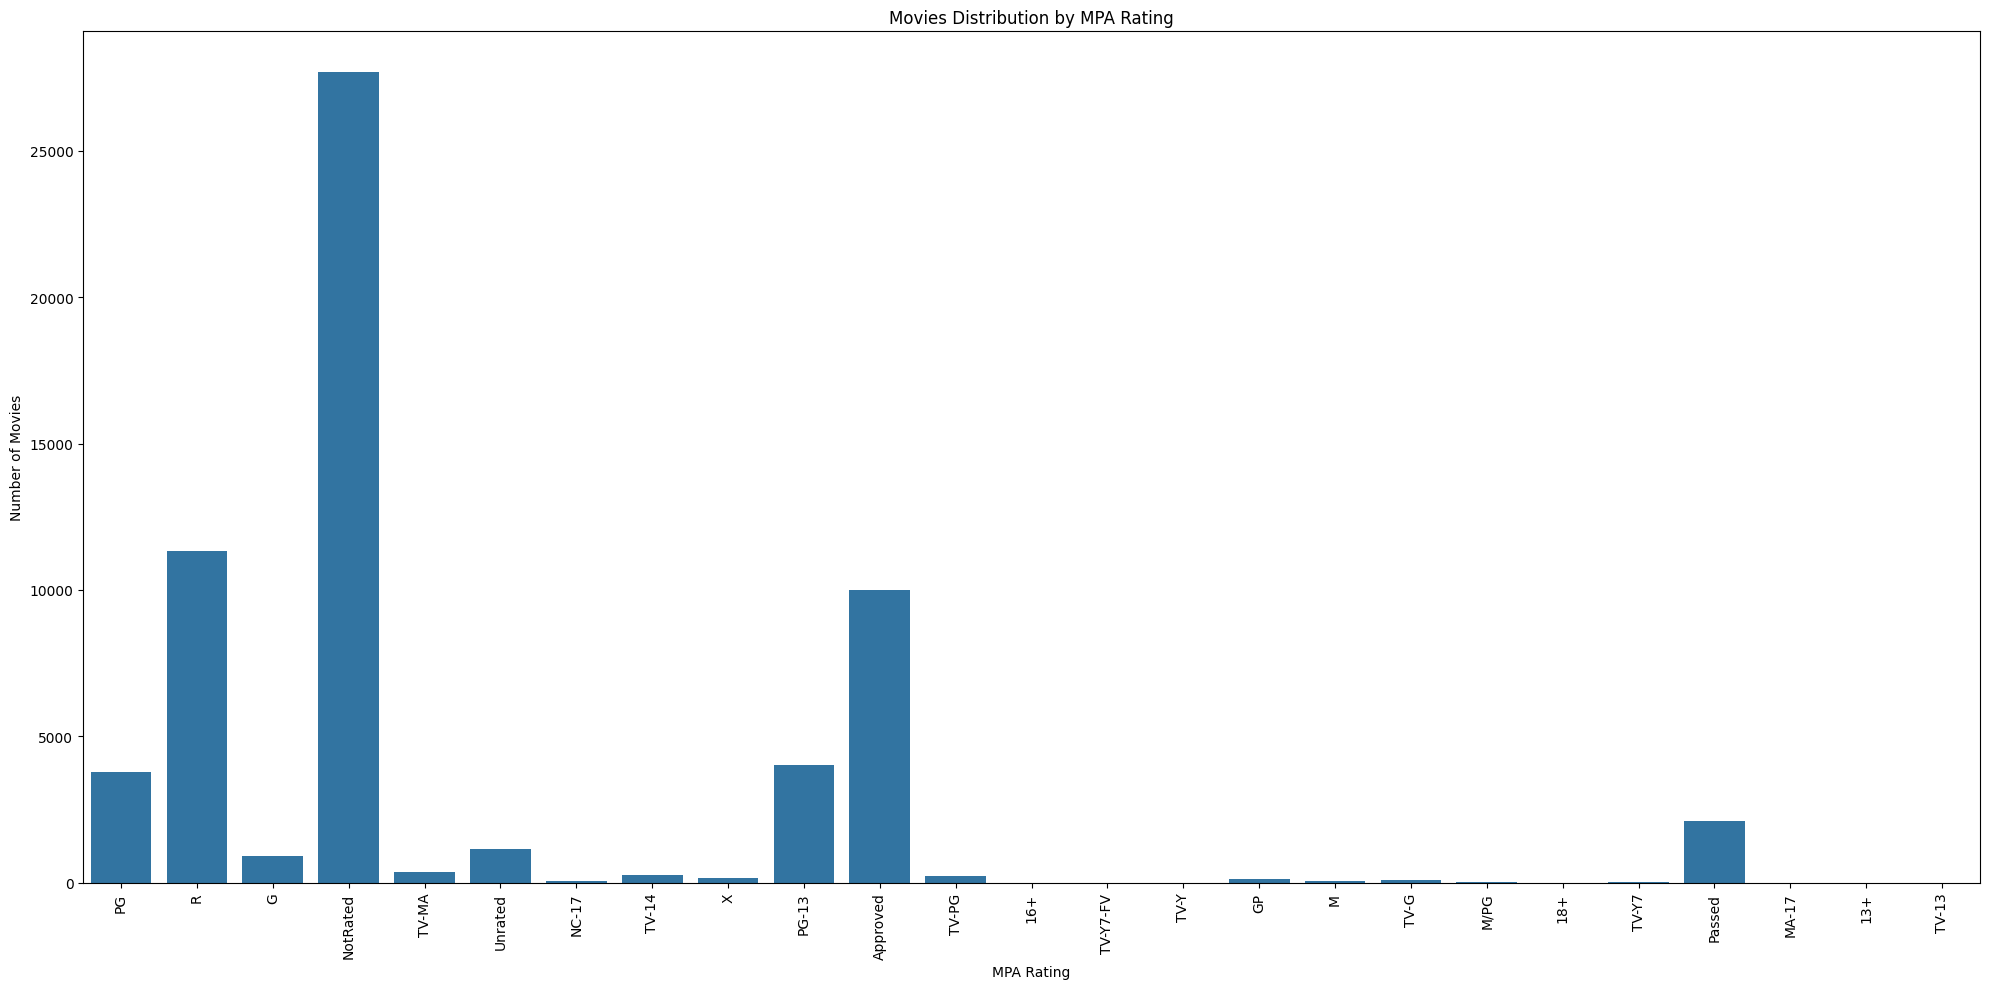

In [17]:
plt.figure(figsize = (20, 10))
plt.title('Movies Distribution by MPA Rating')
plt.xlabel('MPA Rating')
plt.ylabel('Number of Movies')
sns.countplot(x = df['MPA'], data = df)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

In [18]:
df['description'] = list(map(lambda x : x.split(' '), df['description']))

In [19]:
df

,id,title,year,duration,MPA,rating,votes,meta_score,description,writers,...,opening_weekend_gross,gross_worldwide,gross_us_canada,release_date,countries_origin,filming_locations,production_companies,awards_content,genres,languages
0,tt0073195,Jaws,1975,2h 4m,PG,8.1,690K,87.0,"[When, a, massive, killer, shark, unleashes, c...","['Peter Benchley', 'Carl Gottlieb']",...,"$7,061,513","$477,916,625","$267,263,625",1975.0,['United States'],"[""Water Street, Edgartown, Martha's Vineyard, ...","['Zanuck/Brown Productions', 'Universal Pictur...","Won 3 Oscars, 16 wins & 20 nominations total","['Monster Horror', 'Sea Adventure', 'Survival'...",['English']
1,tt0073629,The Rocky Horror Picture Show,1975,1h 40m,R,7.4,174K,65.0,"[A, newly-engaged, couple, have, a, breakdown,...","[""Richard O'Brien"", 'Jim Sharman']",...,NotKnown,"$115,827,018","$112,892,319",1975.0,"['United Kingdom', 'United States']","[""Oakley Court, Windsor Road, Oakley Green, Wi...","['Twentieth Century Fox', 'Michael White Produ...","Awards, 3 wins & 4 nominations total","['B-Horror', 'Dark Comedy', 'Parody', 'Raunchy...",['English']
2,tt0073486,One Flew Over the Cuckoo's Nest,1975,2h 13m,R,8.7,1.1M,84.0,"[In, the, Fall, of, 1963,, a, Korean, War, vet...","['Lawrence Hauben', 'Bo Goldman', 'Ken Kesey']",...,NotKnown,"$109,115,366","$108,981,275",1975.0,['United States'],['Oregon State Mental Hospital - 2600 Center S...,"['Fantasy Films', 'N.V. Zvaluw']","Won 5 Oscars, 38 wins & 15 nominations total","['Medical Drama', 'Psychological Drama', 'Drama']",['English']
3,tt0072890,Dog Day Afternoon,1975,2h 5m,R,8.0,281K,86.0,"[Three, amateur, robbers, plan, to, hold, up, ...","['Frank Pierson', 'P.F. Kluge', 'Thomas Moore']",...,NotKnown,"$50,004,527","$50,000,000",1975.0,['United States'],"['285 Prospect Park West, Brooklyn, New York C...","['Warner Bros.', 'Artists Entertainment Complex']","Won 1 Oscar, 14 wins & 20 nominations total","['Dark Comedy', 'Heist', 'True Crime', 'Biogra...",['English']
4,tt0073692,Shampoo,1975,1h 50m,R,6.4,15K,65.0,"[On, Election, Day,, 1968,, irresponsible, hai...","['Robert Towne', 'Warren Beatty']",...,NotKnown,"$49,407,734","$49,407,734",1975.0,['United States'],"[""2270 Bowmont Drive, Beverly Hills, Californi...","['Persky-Bright / Vista', 'Columbia Pictures',...","Won 1 Oscar, 3 wins & 11 nominations total","['Satire', 'Comedy', 'Drama']",['English']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63244,tt0094976,Death by Dialogue,1988,1h 29m,R,3.2,402,0.0,"[A, guy, and, four, of, his, friends, visit, h...","['Thomas Dewier', 'Susan Trabue']",...,NotKnown,NotKnown,NotKnown,1988.0,['United States'],"['Los Angeles, California, USA']",['City Lights Entertainment Group'],NotKnown,"['Slasher Horror', 'Horror']",['English']
63245,tt0094912,The Courier,1988,1h 25m,R,5.4,143,0.0,"[When, a, courier, at, the, D-Day, Courier, Se...",['Frank Deasy'],...,NotKnown,NotKnown,NotKnown,1988.0,"['United Kingdom', 'Ireland']","['Ardmore Studios, Herbert Road, Bray, County ...",['Bord Scannán na hÉireann / The Irish Film Bo...,NotKnown,"['Action', 'Crime', 'Thriller']","['Irish Gaelic', 'English']"
63246,tt0093117,Tadpole and the Whale,1988,1h 31m,TV-G,6.2,454,0.0,"[On, their, arrival, in, Mingan,, on, the, nor...","['Jean-Claude Lord', 'Lise Thouin', 'Jacques B...",...,NotKnown,NotKnown,NotKnown,1988.0,['Canada'],"[""Île Nue, La réserve de parc national de l'Ar...","['Les Productions La Fête Inc.', 'Téléfilm Can...","Awards, 1 win & 6 nominations total","['Adventure', 'Comedy', 'Drama', 'Family']","['French', 'English']"
63247,tt0099235,The Cellar,1988,1h 25m,PG-13,4.6,1.1K,0.0,"[A, family, moves, into, an, old, house, in, t...","['David Henry Keller', 'John Woodward', 'Darry...",...,NotKnown,NotKnown,NotKnown,1988.0,['United States'],"['Tucson, Arizona, USA']",['Indian Neck Entertainment'],NotKnown,"['Monster Horror', 'Supernatural Horror', 'Hor...",['English']


In [20]:
df['genres'] = df[['genres', 'description', 'writers', 'directors', 'stars']].apply(lambda x: ' '.join(map(str, x)), axis=1)

In [21]:
df['genres'][0]

'[\'Monster Horror\', \'Sea Adventure\', \'Survival\', \'Adventure\', \'Drama\', \'Horror\', \'Thriller\'] [\'When\', \'a\', \'massive\', \'killer\', \'shark\', \'unleashes\', \'chaos\', \'on\', \'a\', \'beach\', \'community\', \'off\', \'Long\', \'Island,\', "it\'s", \'up\', \'to\', \'a\', \'local\', \'sheriff,\', \'a\', \'marine\', \'biologist,\', \'and\', \'an\', \'old\', \'seafarer\', \'to\', \'hunt\', \'the\', \'beast\', \'down.\'] [\'Peter Benchley\', \'Carl Gottlieb\'] [\'Steven Spielberg\'] [\'Roy Scheider\', \'Robert Shaw\', \'Richard Dreyfuss\', \'Lorraine Gary\', \'Murray Hamilton\', \'Carl Gottlieb\', \'Jeffrey Kramer\', \'Susan Backlinie\', \'Jonathan Filley\', \'Ted Grossman\']'

In [22]:
df.drop(columns = ['description', 'writers', 'directors', 'stars'])

,id,title,year,duration,MPA,rating,votes,meta_score,budget,opening_weekend_gross,gross_worldwide,gross_us_canada,release_date,countries_origin,filming_locations,production_companies,awards_content,genres,languages
0,tt0073195,Jaws,1975,2h 4m,PG,8.1,690K,87.0,"$7,000,000 (estimated)","$7,061,513","$477,916,625","$267,263,625",1975.0,['United States'],"[""Water Street, Edgartown, Martha's Vineyard, ...","['Zanuck/Brown Productions', 'Universal Pictur...","Won 3 Oscars, 16 wins & 20 nominations total","['Monster Horror', 'Sea Adventure', 'Survival'...",['English']
1,tt0073629,The Rocky Horror Picture Show,1975,1h 40m,R,7.4,174K,65.0,"$1,200,000 (estimated)",NotKnown,"$115,827,018","$112,892,319",1975.0,"['United Kingdom', 'United States']","[""Oakley Court, Windsor Road, Oakley Green, Wi...","['Twentieth Century Fox', 'Michael White Produ...","Awards, 3 wins & 4 nominations total","['B-Horror', 'Dark Comedy', 'Parody', 'Raunchy...",['English']
2,tt0073486,One Flew Over the Cuckoo's Nest,1975,2h 13m,R,8.7,1.1M,84.0,"$3,000,000 (estimated)",NotKnown,"$109,115,366","$108,981,275",1975.0,['United States'],['Oregon State Mental Hospital - 2600 Center S...,"['Fantasy Films', 'N.V. Zvaluw']","Won 5 Oscars, 38 wins & 15 nominations total","['Medical Drama', 'Psychological Drama', 'Dram...",['English']
3,tt0072890,Dog Day Afternoon,1975,2h 5m,R,8.0,281K,86.0,"$1,800,000 (estimated)",NotKnown,"$50,004,527","$50,000,000",1975.0,['United States'],"['285 Prospect Park West, Brooklyn, New York C...","['Warner Bros.', 'Artists Entertainment Complex']","Won 1 Oscar, 14 wins & 20 nominations total","['Dark Comedy', 'Heist', 'True Crime', 'Biogra...",['English']
4,tt0073692,Shampoo,1975,1h 50m,R,6.4,15K,65.0,"$4,000,000 (estimated)",NotKnown,"$49,407,734","$49,407,734",1975.0,['United States'],"[""2270 Bowmont Drive, Beverly Hills, Californi...","['Persky-Bright / Vista', 'Columbia Pictures',...","Won 1 Oscar, 3 wins & 11 nominations total","['Satire', 'Comedy', 'Drama'] ['On', 'Election...",['English']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63244,tt0094976,Death by Dialogue,1988,1h 29m,R,3.2,402,0.0,NotKnown,NotKnown,NotKnown,NotKnown,1988.0,['United States'],"['Los Angeles, California, USA']",['City Lights Entertainment Group'],NotKnown,"['Slasher Horror', 'Horror'] ['A', 'guy', 'and...",['English']
63245,tt0094912,The Courier,1988,1h 25m,R,5.4,143,0.0,NotKnown,NotKnown,NotKnown,NotKnown,1988.0,"['United Kingdom', 'Ireland']","['Ardmore Studios, Herbert Road, Bray, County ...",['Bord Scannán na hÉireann / The Irish Film Bo...,NotKnown,"['Action', 'Crime', 'Thriller'] ['When', 'a', ...","['Irish Gaelic', 'English']"
63246,tt0093117,Tadpole and the Whale,1988,1h 31m,TV-G,6.2,454,0.0,NotKnown,NotKnown,NotKnown,NotKnown,1988.0,['Canada'],"[""Île Nue, La réserve de parc national de l'Ar...","['Les Productions La Fête Inc.', 'Téléfilm Can...","Awards, 1 win & 6 nominations total","['Adventure', 'Comedy', 'Drama', 'Family'] ['O...","['French', 'English']"
63247,tt0099235,The Cellar,1988,1h 25m,PG-13,4.6,1.1K,0.0,NotKnown,NotKnown,NotKnown,NotKnown,1988.0,['United States'],"['Tucson, Arizona, USA']",['Indian Neck Entertainment'],NotKnown,"['Monster Horror', 'Supernatural Horror', 'Hor...",['English']


In [23]:
df_movies = df[['id','title', 'genres']].copy()
df_movies

,id,title,genres
0,tt0073195,Jaws,"['Monster Horror', 'Sea Adventure', 'Survival'..."
1,tt0073629,The Rocky Horror Picture Show,"['B-Horror', 'Dark Comedy', 'Parody', 'Raunchy..."
2,tt0073486,One Flew Over the Cuckoo's Nest,"['Medical Drama', 'Psychological Drama', 'Dram..."
3,tt0072890,Dog Day Afternoon,"['Dark Comedy', 'Heist', 'True Crime', 'Biogra..."
4,tt0073692,Shampoo,"['Satire', 'Comedy', 'Drama'] ['On', 'Election..."
...,...,...,...
63244,tt0094976,Death by Dialogue,"['Slasher Horror', 'Horror'] ['A', 'guy', 'and..."
63245,tt0094912,The Courier,"['Action', 'Crime', 'Thriller'] ['When', 'a', ..."
63246,tt0093117,Tadpole and the Whale,"['Adventure', 'Comedy', 'Drama', 'Family'] ['O..."
63247,tt0099235,The Cellar,"['Monster Horror', 'Supernatural Horror', 'Hor..."


In [24]:
from sklearn.feature_extraction.text import CountVectorizer
df_movies['genres'] = df_movies['genres'].astype(str)
vectors = CountVectorizer(stop_words='english', max_features=384)
vectorized_data = vectors.fit_transform(df_movies['genres'])
vectorized_data = vectorized_data.toarray()

In [25]:
vectors.get_feature_names_out()

array(['action', 'adam', 'adams', 'adventure', 'agent', 'al', 'alan',
       'albert', 'alex', 'alexander', 'alfred', 'alice', 'allen',
       'american', 'anderson', 'andrew', 'andré', 'animation', 'ann',
       'anna', 'anne', 'anthony', 'antonio', 'army', 'arthur', 'away',
       'baker', 'barbara', 'barry', 'beautiful', 'begins', 'ben',
       'bennett', 'bernard', 'best', 'betty', 'big', 'billy', 'biography',
       'black', 'bob', 'boy', 'brian', 'british', 'brother', 'brown',
       'bruce', 'business', 'car', 'carl', 'carlos', 'catherine',
       'charles', 'child', 'children', 'chris', 'christian',
       'christopher', 'city', 'claire', 'clark', 'claude', 'college',
       'come', 'comedy', 'comes', 'cooper', 'country', 'couple', 'crime',
       'dan', 'daniel', 'danny', 'dark', 'daughter', 'david', 'davis',
       'day', 'dead', 'death', 'decides', 'dennis', 'detective', 'dick',
       'discovers', 'doctor', 'documentary', 'does', 'don', 'donald',
       'dorothy', 'douglas'

In [26]:
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(n_neighbors = 20, metric = 'cosine')

In [27]:
model2 = knn.fit(vectorized_data)

In [28]:
dis, ind = knn.kneighbors(vectorized_data[0].reshape(1, -1))
df_movies.iloc[ind[0], :].head(20)

,id,title,genres
0,tt0073195,Jaws,"['Monster Horror', 'Sea Adventure', 'Survival'..."
9721,tt0078935,Cannibal Holocaust,"['B-Horror', 'Found Footage Horror', 'Jungle A..."
14954,tt0077766,Jaws 2,"['Monster Horror', 'Sea Adventure', 'Survival'..."
6015,tt0085750,Jaws 3-D,"['Monster Horror', 'Sea Adventure', 'Survival'..."
688,tt0078437,Last Cannibal World,"['Jungle Adventure', 'Splatter Horror', 'Adven..."
4794,tt1410051,Retreat,"['Drama', 'Horror', 'Thriller'] ['Kate', 'and'..."
626,tt0076504,Orca,"['Adventure', 'Drama', 'Horror', 'Thriller'] [..."
38435,tt0082700,Cannibal Ferox,"['B-Horror', 'Jungle Adventure', 'Adventure', ..."
28739,tt0050095,The Abominable Snowman,"['B-Horror', 'Adventure', 'Horror'] ['A', 'kin..."
42117,tt4262980,Shin Godzilla,"['Body Horror', 'Dinosaur Adventure', 'Disaste..."


In [29]:
df_movies = df_movies.reset_index(drop=True)

In [31]:
import pickle

with open('model2.pkl', 'wb') as f:
    pickle.dump(
        {
            'df' : df_movies,
            'vector' : vectorized_data,
            'model' : model2
        }, f
    )

In [24]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

BERT_vector = model.encode(df_movies['genres'].astype(str), show_progress_bar = True, device = 'cuda')

Batches:   0%|          | 0/1952 [00:00<?, ?it/s]

In [32]:
knn_model = knn.fit(BERT_vector)

In [34]:
import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(
        {
            'df' : df_movies,
            'BERT_vector' : BERT_vector,
            'model' : knn_model
        }, f
    )

In [31]:
dis, ind = knn.kneighbors(BERT_vector[0].reshape(1, -1))
df_movies.iloc[ind[0], :].head(20)

,id,title,genres
0,tt0073195,Jaws,"['Monster Horror', 'Sea Adventure', 'Survival'..."
32128,tt0118956,Deep Rising,"['Monster Horror', 'Action', 'Adventure', 'Hor..."
14815,tt0077766,Jaws 2,"['Monster Horror', 'Sea Adventure', 'Survival'..."
12531,tt0097737,Leviathan,"['Body Horror', 'Adventure', 'Horror', 'Myster..."
31213,tt0172669,Komodo,"['Adventure', 'Horror', 'Sci-Fi', 'Thriller'] ..."
6772,tt0088100,Devil Fish,"['B-Horror', 'Dark Comedy', 'Action', 'Adventu..."
28481,tt0050084,20 Million Miles to Earth,"['Adventure Epic', 'Kaiju', 'Monster Horror', ..."
959,tt0078159,Return to Boggy Creek,"['Adventure', 'Drama', 'Family', 'Horror', 'My..."
61962,tt0094761,The Blob,"['Alien Invasion', 'Body Horror', 'Monster Hor..."
5946,tt0085750,Jaws 3-D,"['Monster Horror', 'Sea Adventure', 'Survival'..."


In [28]:
import requests
import time

def get_poster_url(imdb_id, api_key):
    # Step 1: Use the IMDb ID to find the movie in TMDb
    url = f"https://api.themoviedb.org/3/find/{imdb_id}?api_key={api_key}&external_source=imdb_id"
    time.sleep(0.5)
    response = requests.get(url, verify=True)
    data = response.json()

    # Step 2: Check if we got any results
    if data.get("movie_results"):
        poster_path = data["movie_results"][0].get("poster_path")
        
        # Step 3: Build the full poster URL
        if poster_path:
            return f"https://image.tmdb.org/t/p/w500{poster_path}"
    
    return None

In [29]:
def recommand(movie_name: str, n: int):
    # api_key = "579df19b2fbced119afad02b8268bfb3"
    recommanded_movies = []
    ids = []
    movies_urls = []
    # Find the index of the movie by title
    if movie_name not in df_movies['title'].values:
        print(f"Movie '{movie_name}' not found in the dataset.")
        return None
    movie_idx = df_movies[df_movies['title'] == movie_name].index[0]
    # Get the nearest neighbors
    dis, ind = knn.kneighbors(BERT_vector[movie_idx].reshape(1, -1), n_neighbors=n+1)
    for i in ind[0]:
        if i != movie_idx:
            recommanded_movies.append(df_movies.iloc[i][1])
            ids.append(df_movies.iloc[i][0])
    #poster fetching
    # for i in ids:
    #     poster_url = get_poster_url(i, api_key)
    #     movies_urls.append(poster_url)
    return recommanded_movies, ids

In [30]:
recommand("I Walk Alone", 10)

C:\Users\hp333\AppData\Local\Temp\ipykernel_3724\1879908946.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  recommanded_movies.append(df_movies.iloc[i][1])
C:\Users\hp333\AppData\Local\Temp\ipykernel_3724\1879908946.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ids.append(df_movies.iloc[i][0])


(['The Phenix City Story',
  'The Price of Fear',
  "The People Against O'Hara",
  'Fingerman',
  'Love That Brute',
  'Shockproof',
  '99 River Street',
  'Johnny Stool Pigeon',
  'Loophole',
  'The Las Vegas Story'],
 ['tt0048488',
  'tt0049636',
  'tt0043914',
  'tt0048072',
  'tt0042688',
  'tt0041871',
  'tt0045465',
  'tt0041529',
  'tt0047192',
  'tt0044825'])